# OScofo

In [39]:
import librosa
import numpy as np
import music21
import math
import matplotlib.pyplot as plt
import IPython.display 


## Markov Class

In [15]:
import os

from enum import Enum


class EventType(Enum):
    NOTE = 1
    TRANSITION = 2


class MarkovType(Enum):
    SEMIMARKOV = 1
    MARKOV = 2


class State:
    def __init__(self):
        self.pitch = ""
        self.dur = 0
        self.bpm = 0
        self.markov_type = ""
        self.event_type = ""
        self.event_index = 0
        self.score_index = 0
        self.type = ""

    def __str__(self):
        if self.markov_type == MarkovType.SEMIMARKOV:
            return f"<SEMI-MARKOV NOTE {self.pitch}>"
        elif self.markov_type == MarkovType.MARKOV:
            return f"<MARKOV NOTE {self.pitch}>"

        return f"<{self.event_type} NOTE {self.pitch}>"

    def __repr__(self):
        return self.__str__()


# Next block parse the Score

Here we have more class definitions.

In [4]:
import os
import music21


class Score:
    def __init__(self, score):
        self.states = []
        if os.path.exists(score):
            self.score = score
        else:
            raise FileNotFoundError

        # read score file
        with open(score, "r") as file:
            self.score = file.read()

        # make semi-markov chain
        lines = self.score.split("\n")
        bpm = 0
        score_index = 0
        for line in lines:
            newstate = State()
            tokens = line.split(" ")
            if tokens[0] == "BPM":
                bpm = int(tokens[1])
            elif tokens[0] == "NOTE":
                score_index += 1
                newstate.score_index = score_index
                newstate.bpm = bpm
                newstate.pitch = tokens[1]
                newstate.template = self.get_pitch_template(newstate.pitch)
                newstate.dur = tokens[2]
                newstate.event_type = EventType.NOTE
                newstate.markov_type = MarkovType.SEMIMARKOV
                self.states.append(newstate)
                trans_event = self.get_trans_event(score_index)
                self.states.append(trans_event)


    def get_pitch_template(self, midi):
        pitch = music21.pitch.Pitch(float(midi))
        freq = pitch.frequency

        pass
    
   
    
    def get_trans_event(self, index):
        newstate = State()
        newstate.pitch = 0
        newstate.score_index = index
        newstate.dur = 0
        newstate.event_type = EventType.TRANSITION
        newstate.markov_type = MarkovType.MARKOV
        return newstate


## Audio Analisys

In [40]:
class Audio:
    def __init__(self, audiofile, fft_size, sr):
        self.samples, self.sr = librosa.load(audiofile, sr=sr)
        self.fft_size = fft_size
        self.len = len(self.samples)
        

    def get_spectrogram(self, audio_samples):
        fft = np.fft.fft(audio_samples, n=self.fft_size)
        fft = fft[:self.fft_size]  # Use FFT_SIZE to get half of the fft
        self.magnitude = (np.abs(fft) / self.fft_size) / self.fft_size


# Time Syncronization

In [7]:
class TimeInference:
    def __init__(self):
        pass





# Inference Algorithm

In [8]:
class Inference:
    def __init__(self, audio, states):
        pass

# Main Function

Score: Test0.txt | Audio: Test0.wav
SR: 48000 | FFT: 4096 | HOP_SIZE: 1024
Block Dur: 0.021333333333333333
547200


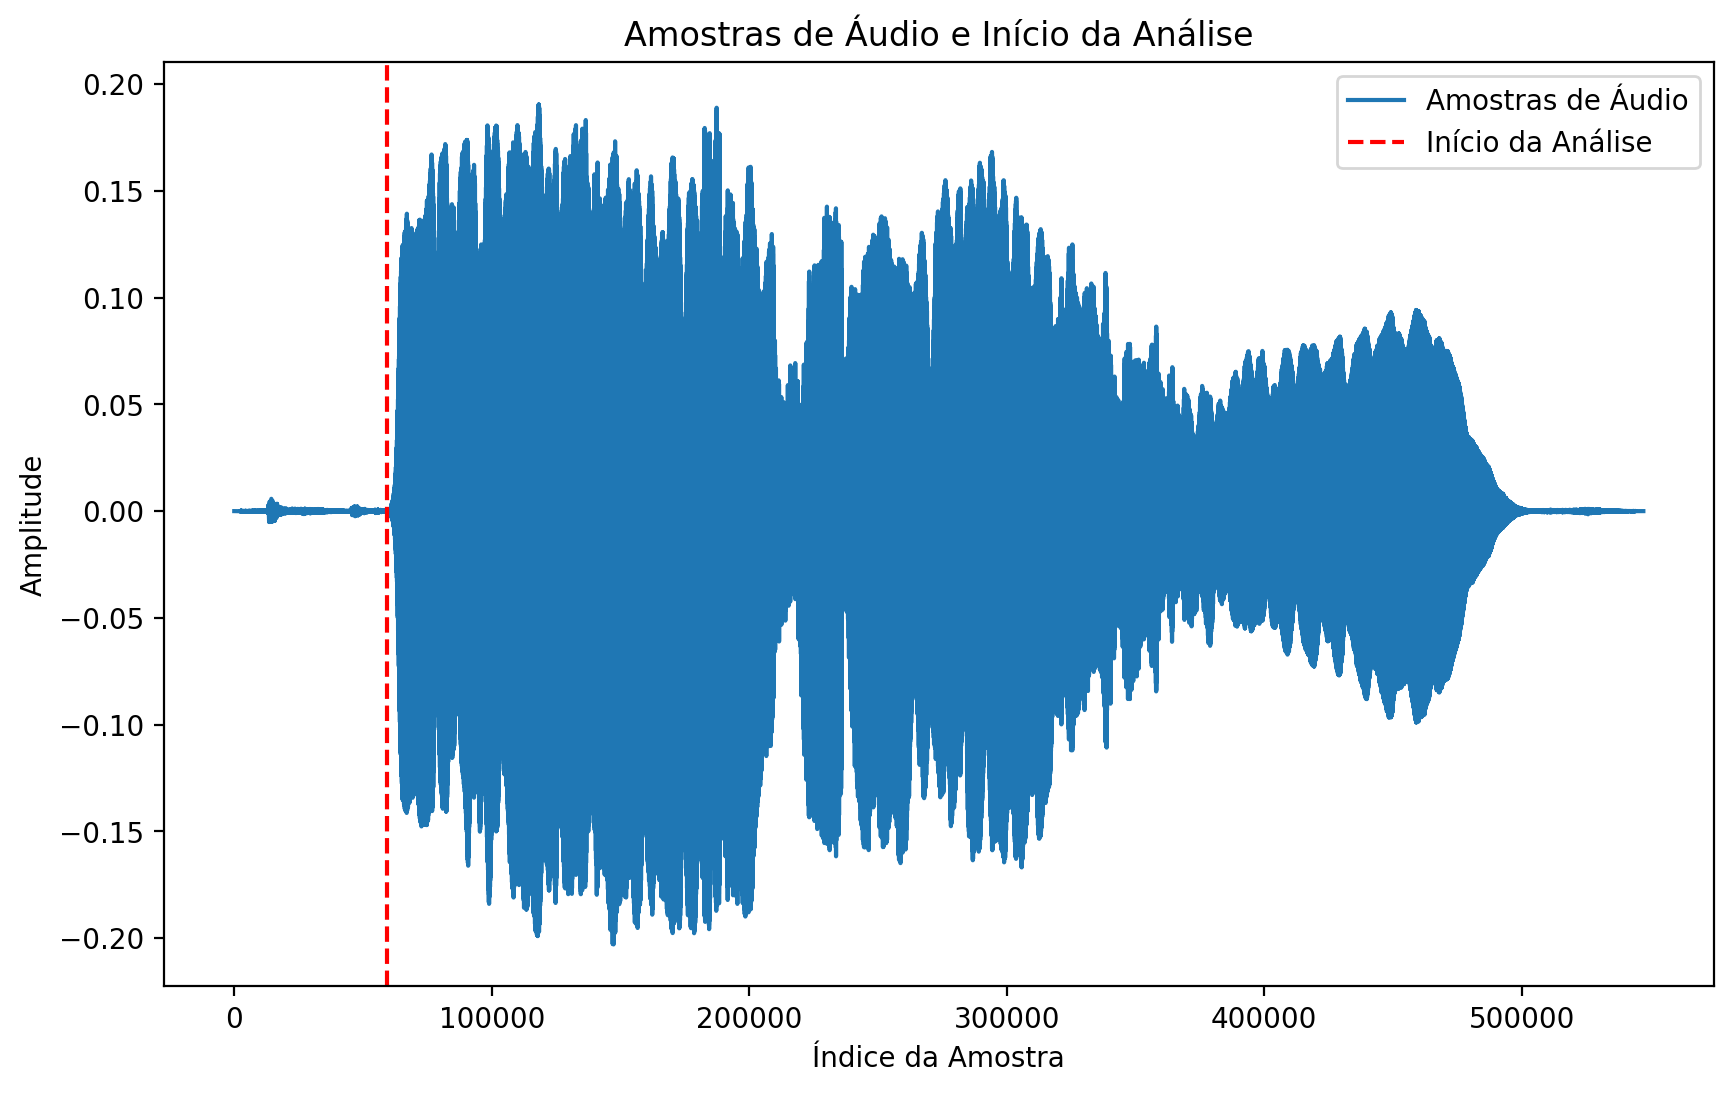

In [44]:
AUDIO_FILE = "Test0.wav"
SCORE_FILE = "Test0.txt"
SR_AUDIO = 48000
HOP_SIZE = 1024
FFT_SIZE = 4096
BLOCK_DUR = 1 / SR_AUDIO * HOP_SIZE
DB_FOR_SILENCE = -50

print(f"Score: {SCORE_FILE} | Audio: {AUDIO_FILE}")
print(f"SR: {SR_AUDIO} | FFT: {FFT_SIZE} | HOP_SIZE: {HOP_SIZE}")
print(f"Block Dur: {BLOCK_DUR}")


audio = Audio(AUDIO_FILE, FFT_SIZE, SR_AUDIO)
score = Score(SCORE_FILE)
print(audio.len)

CURRENT_TIME = 0
COMECAR_AQUI = 0
for i in range(0, audio.len - FFT_SIZE + 1, HOP_SIZE):
    block = audio.samples[i:i + FFT_SIZE]
    CURRENT_TIME += BLOCK_DUR
    if len(block) > FFT_SIZE:
        break
    rms = np.sqrt(np.mean(block**2))
    dB = 20 * math.log10(rms)
    if dB < DB_FOR_SILENCE:
        continue
    if COMECAR_AQUI == 0:
        COMECAR_AQUI = i
    break



plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the audio samples
plt.plot(audio.samples, label='Amostras de Áudio')

# Add a vertical line to mark the start of analysis
plt.axvline(COMECAR_AQUI, color='red', linestyle='--', label='Início da Análise')

# Set labels and title
plt.xlabel('Índice da Amostra')
plt.ylabel('Amplitude')
plt.title('Amostras de Áudio e Início da Análise')

# Add a legend
plt.legend()

# Show the plot
plt.show()
IPython.display.Audio(audio.samples, rate=SR_AUDIO)
    


